In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# <b>Data Load

In [2]:
df  = pd.read_csv("./data/Diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<pre>
Pregnancies              : Number of times pregnant
Glucose                  : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure            : Diastolic blood pressure (mm Hg)
SkinThickness            : Triceps skin fold thickness (mm)
Insulin                  : 2-Hour serum insulin (mu U/ml)
BMI                      : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction : Diabetes pedigree function  # 당뇨유전수치
Age                      : Age (years)
Outcome                  : Class variable (0 or 1) 268 of 768 are 1, the others are 0

# <b>Model selection

In [22]:
#-----------------------모델선택-----------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



#-----------------------전처리-----------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler, RobustScaler, StandardScaler,
                                   LabelEncoder, OneHotEncoder)
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score,
                                    cross_validate, GridSearchCV)

#-----------------------평가-----------------------------------------------------------
# from sklearn.metrics import mean_squared_error 
from sklearn.metrics import (accuracy_score, f1_score , precision_score , recall_score, precision_recall_curve, 
                            roc_curve, roc_auc_score, classification_report, confusion_matrix)



<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Scoring string name</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><font color=red><b>‘accuracy’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><p><font color=red><b>‘f1’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p><p><font color=red><b>‘precision’ etc.</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p><p><font color=red><b>‘recall’ etc.</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p><p><font color=red><b>‘roc_auc’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

# <b>EDA

<Figure size 1000x500 with 0 Axes>

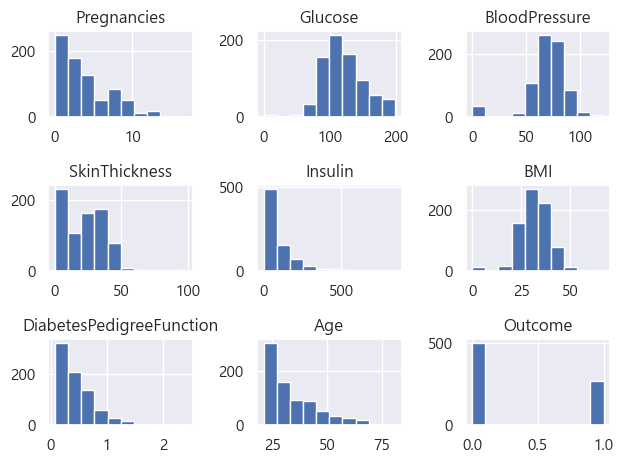

In [6]:
plt.figure(figsize=(10,5))
df.hist()
plt.tight_layout()
plt.show()

<pre> 이상치 기준
Glucose          < 140        ≥ 200
BloodPressure    60 – 80      ≥ 90
SkinThickness   18 ~ 30       > 30–35
Insulin         16 ~ 166
BMI             17 ~ 23       ≥ 30
DPF                           > 0.6> 1.0

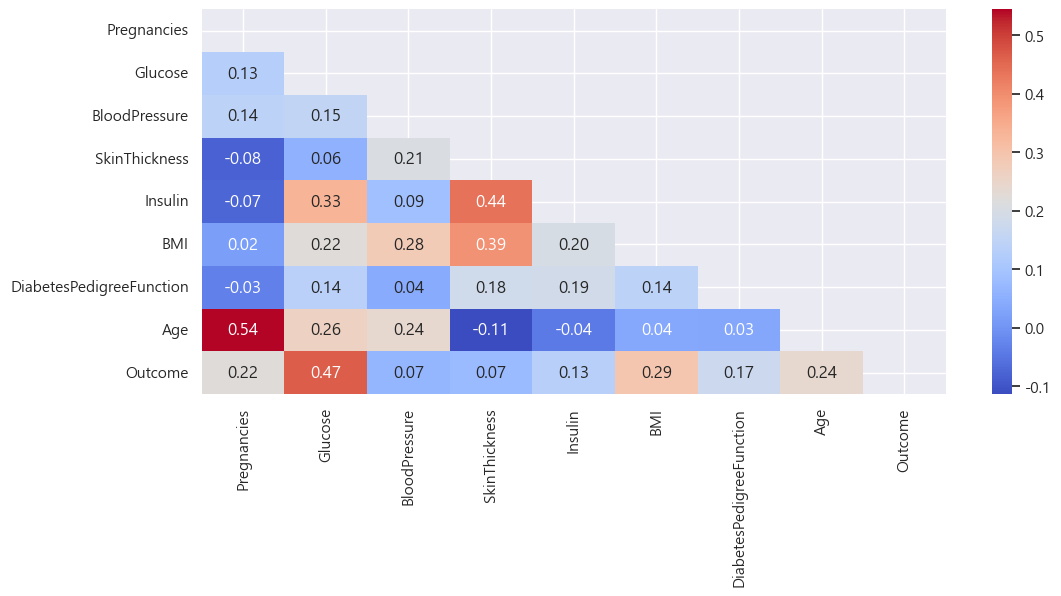

In [7]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.columns = ['pgcnt', 'glucose', 'bpress', 'skin', 'insulin','bmi', 'dpf', 'age', 'target']

In [10]:
df.columns

Index(['pgcnt', 'glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf', 'age',
       'target'],
      dtype='object')

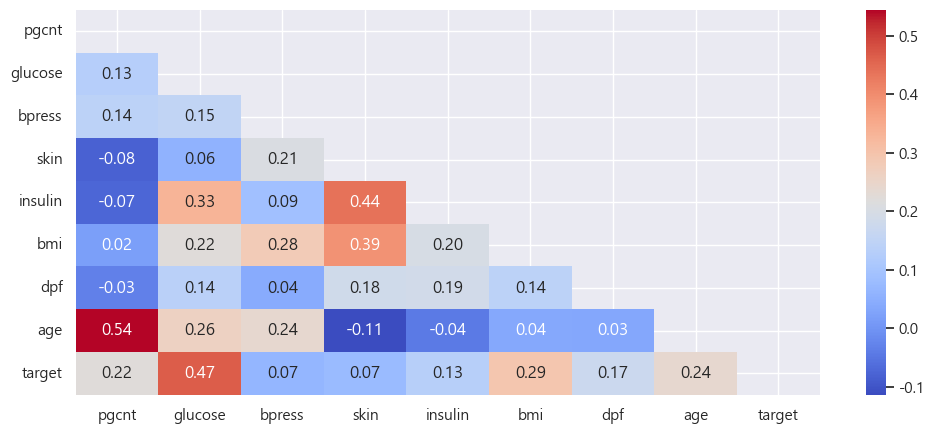

In [11]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [12]:
y = df['target']
X = df.drop(['target'], axis=1)
X.shape, y.shape

((768, 8), (768,))

In [14]:
y.value_counts()

target
0    500
1    268
Name: count, dtype: int64

# <b> 기본모델 확인

In [25]:
model_list = [DecisionTreeClassifier(), RandomForestClassifier()]
X80, X20, y80, y20 = train_test_split(X, y, test_size = 0.2, random_state=4567, stratify=y)
for model in model_list:
    model.fit(X80, y80)
    pred = model.predict(X20)
    acc = accuracy_score(y20, pred)
    f1 = f1_score(y20, pred)
    precision = precision_score(y20, pred)
    recall = recall_score(y20, pred)
    roc_auc = roc_auc_score(y20, pred)
    report = classification_report(y20, pred)
    cm = confusion_matrix(y20, pred)
    print(f"acc:{acc:.4f}\t f1:{f1:.4f}\t precision:{precision:.4f}\t recall:{recall:.4f}\t roc_auc:{roc_auc:.4f}")
    print()
    print(report)
    print()
    print(cm)
    print()
    

acc:0.7208	 f1:0.5981	 precision:0.6038	 recall:0.5926	 roc_auc:0.6913

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.60      0.59      0.60        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154


[[79 21]
 [22 32]]

acc:0.7532	 f1:0.6122	 precision:0.6818	 recall:0.5556	 roc_auc:0.7078

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


[[86 14]
 [24 30]]

